## Female and Male Dataset

The dataset archive contains 3801 images of female and male. We will train our algorithm on these files and predict the labels as (0 = female, 1 = male).

### 1 Import Library

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import random
import os

mypath = "D:\IT World\Magnimind_Academy\projects\dl_gender\celeb_small\input"
print(os.listdir(mypath))
#print(os.listdir("celeb_small\input"))

['test_set', 'train_set']


### 2 Define Constants

In [2]:
FAST_RUN = True #False
# IMAGE_WIDTH=218
# IMAGE_HEIGHT=178
IMAGE_WIDTH=178
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

### 3 Prepare Traning Data

In [3]:
# Define car=1, flower=0 
filenames = os.listdir(os.path.join(mypath, "train_set"))
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == "man":
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df

,filename,category
0,female.000009.jpg,0
1,female.000031.jpg,0
2,female.000093.jpg,0
3,female.000142.jpg,0
4,female.000148.jpg,0
...,...,...
2995,man.037129.jpg,1
2996,man.037138.jpg,1
2997,man.037153.jpg,1
2998,man.037167.jpg,1


#### 3.1 See Total In count

Male  : 1
Female: 0
0    1500
1    1500
Name: category, dtype: int64


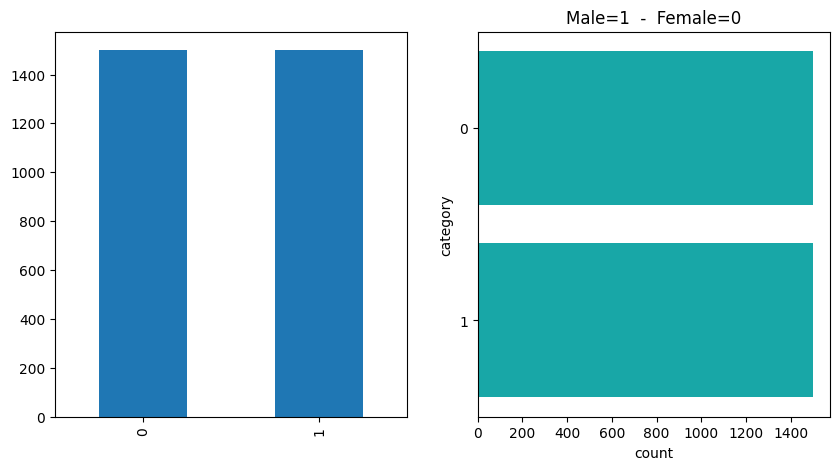

In [4]:
from matplotlib.pyplot import figure

figure(figsize=(10,5))
plt.subplot(1,2,1)
df.category.value_counts().plot.bar();
print("Male  : 1")
print("Female: 0")
print(df.category.value_counts())
plt.subplot(1,2,2)
plt.title("Male=1  -  Female=0")
sns.countplot(y='category', data=df, color="c");

In [5]:
# # male=1, female=0 
# df.category.value_counts().plot.bar()
# print("Male  : 1,  Female: 0")
# df.category.value_counts()

In [6]:
# plt.title("Male=1  -  Female=0")
# sns.countplot(y='category', data=df, color="c")
# plt.show()

#### 3.2 See sample image

(218, 178, 3)


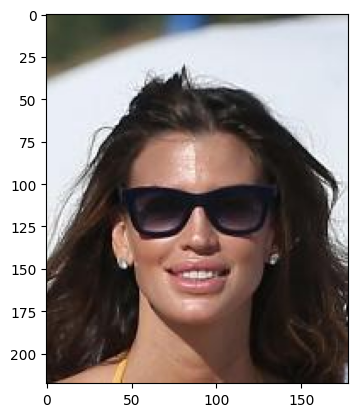

In [7]:
import cv2
sample = np.random.choice(filenames)
pathimage=os.path.join(mypath, "train_set/")
img = cv2.imread(pathimage+sample)
print(img.shape)

from tensorflow.keras.preprocessing.image import load_img
# pathimage=os.path.join(mypath, "train_set/")
# sample = np.random.choice(filenames)
image = load_img(pathimage+sample)
plt.imshow(image);

(218, 178, 3)
array([[[ 74,  79,  56],
        [ 73,  78,  55],
        [ 72,  77,  55],
        ...,
        [191, 195, 198],
        [190, 193, 198],
        [190, 193, 200]],

       [[ 74,  79,  56],
        [ 74,  79,  56],
        [ 72,  77,  55],
        ...,
        [196, 200, 203],
        [197, 200, 205],
        [197, 200, 207]],

       [[ 75,  80,  57],
        [ 74,  79,  56],
        [ 72,  77,  55],
        ...,
        [203, 207, 210],
        [204, 207, 212],
        [204, 207, 214]],

       ...,

       [[ 38,  28,  26],
        [ 38,  29,  24],
        [ 35,  24,  20],
        ...,
        [ 98,  89,  92],
        [129, 132, 139],
        [168, 177, 186]],

       [[ 45,  36,  31],
        [ 51,  42,  37],
        [ 42,  31,  27],
        ...,
        [ 88,  79,  84],
        [186, 190, 199],
        [166, 176, 186]],

       [[ 25,  16,  11],
        [ 38,  29,  24],
        [ 44,  31,  25],
        ...,
        [ 88,  79,  84],
        [181, 185, 194],
        [1

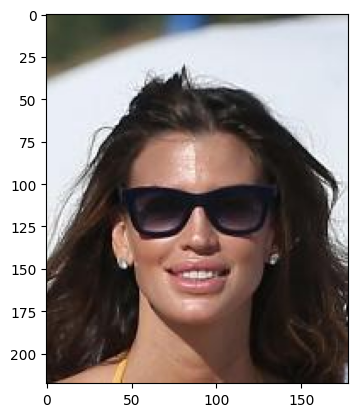

In [8]:
import cv2
img = cv2.imread(pathimage+sample)
print(img.shape)

from PIL import Image
img = np.asarray(Image.open(pathimage+sample))
print(repr(img))

imgplot = plt.imshow(img)

### 4 Build Model

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have car and flower classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 176, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 88, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 86, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 86, 61, 64)       2

### 5 Callbacks

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
#Early Stop
earlystop = EarlyStopping(patience=10)
# Learning Rate Reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
# Callbacks
callbacks = [earlystop, learning_rate_reduction]

### 6 Prepare data

In [11]:
# We will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. 
# Then imagenerator will convert it one-hot encoding which is good for our classification.
# So we will convert 1 to male and 0 to female.

In [12]:
df["category"] = df["category"].replace({1:"male", 0:"female"}) 

In [13]:
from sklearn.model_selection import train_test_split

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=99)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

print("train_df : {}\nvalidate_df : {}".format(train_df.shape, validate_df.shape))

train_df : (2400, 2)
validate_df : (600, 2)


male=1, female=0 


male      1201
female    1199
Name: category, dtype: int64

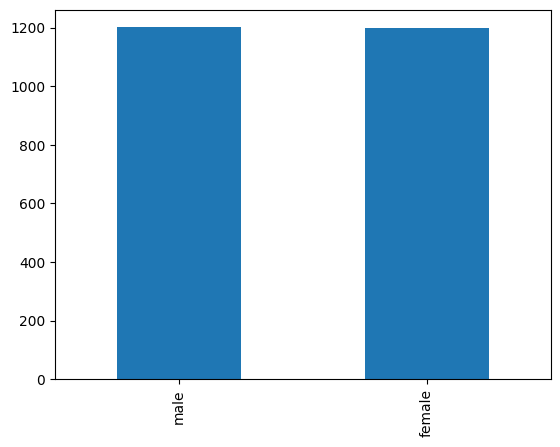

In [14]:
# male=1, female=0 
train_df.category.value_counts().plot.bar()
print("male=1, female=0 ")
train_df.category.value_counts()

In [15]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=20

### 7 Generating the Data

#### 7.1 Traning Generator

In [16]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2400 validated image filenames belonging to 2 classes.


#### 7.2 Validation Generator

In [17]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 600 validated image filenames belonging to 2 classes.


### 8 See how our generator work

In [18]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


[1.]


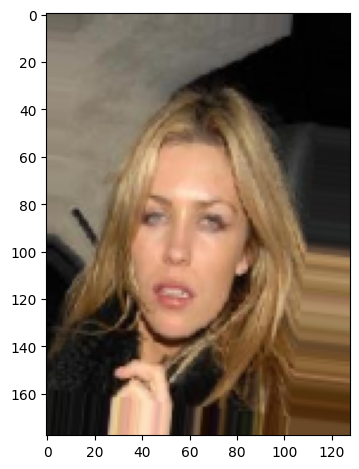

In [19]:
for X_batch, Y_batch in example_generator:
    image = X_batch[0]
    tt = Y_batch[0]
    plt.imshow(image)
    print(tt)
    break
plt.tight_layout()
plt.show()

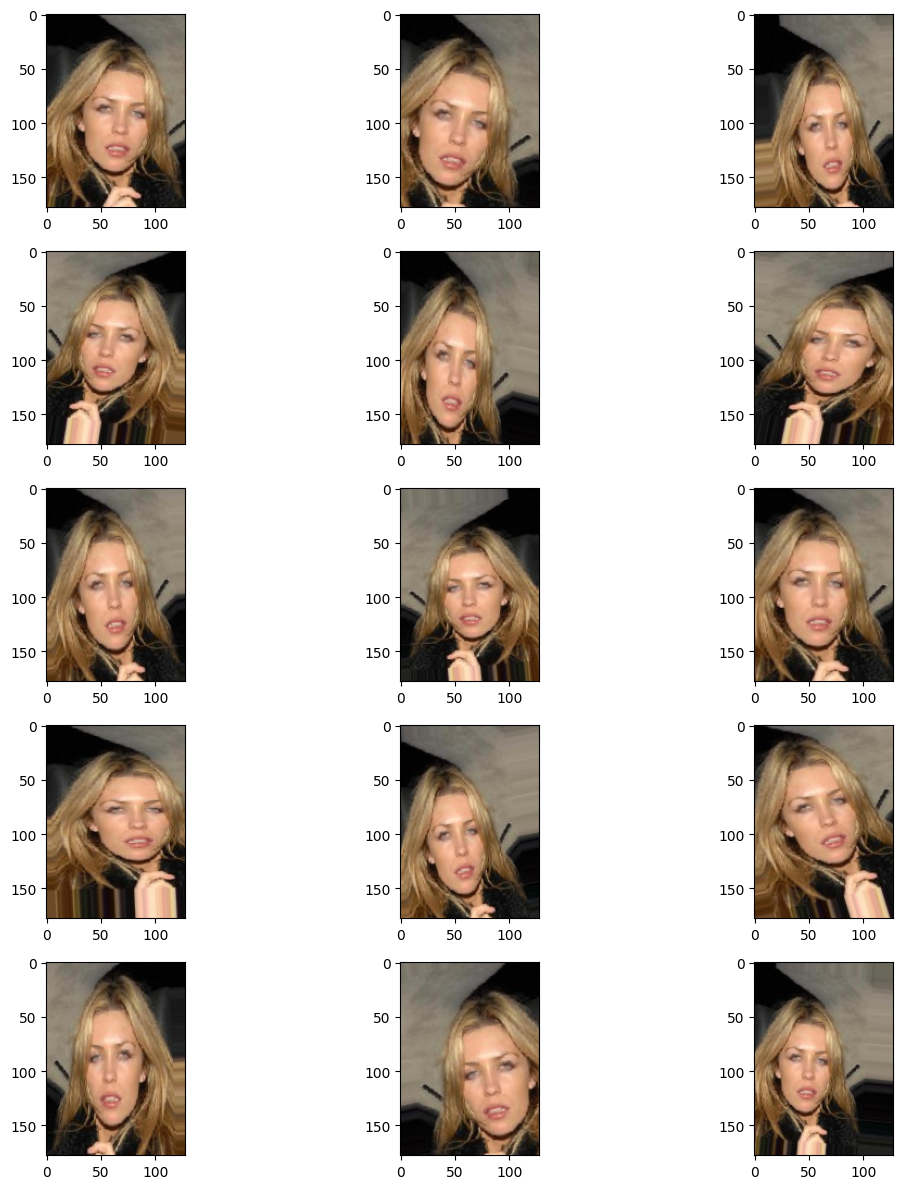

In [20]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### 9 Fit Model

In [21]:
# total_train = train_df.shape[0]
# total_validate = validate_df.shape[0]
# batch_size=20

validation_steps=total_validate//batch_size
steps_per_epoch=total_train//batch_size

print("total_validate: ", total_validate)
print("total_train: ", total_train)
print("batch_size: ", batch_size)
print("validation_steps: ", validation_steps)
print("steps_per_epoch: ", steps_per_epoch)

total_validate:  600
total_train:  2400
batch_size:  20
validation_steps:  30
steps_per_epoch:  120


In [22]:
# import tensorflow
# print(tensorflow.test.gpu_device_name())

# tensorflow.device('/device:GPU:0')

# model.reset_states()

In [24]:
%%time

# epochs=3 if FAST_RUN else 10
# with tensorflow.device('/device:GPU:0'):
#     history = model.fit_generator(
#         train_generator, 
#         epochs=epochs,
#         validation_data=validation_generator,
#         validation_steps=total_validate//batch_size,
#         steps_per_epoch=total_train//batch_size,
#         callbacks=callbacks
#     )

epochs=5 if FAST_RUN else 20
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<timed exec>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
120/120 [==============================] - 179s 1s/step - loss: 0.8090 - accuracy: 0.6604 - val_loss: 1.1243 - val_accuracy: 0.5017 - lr: 0.0010
Epoch 2/5
120/120 [==============================] - 178s 1s/step - loss: 0.7108 - accuracy: 0.6758 - val_loss: 0.7594 - val_accuracy: 0.5917 - lr: 0.0010
Epoch 3/5
120/120 [==============================] - 174s 1s/step - loss: 0.6036 - accuracy: 0.7204 - val_loss: 0.6468 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 4/5
120/120 [==============================] - 178s 1s/step - loss: 0.5938 - accuracy: 0.7088 - val_loss: 0.6701 - val_accuracy: 0.6117 - lr: 0.0010
Epoch 5/5
120/120 [==============================] - 152s 1s/step - loss: 0.6087 - accuracy: 0.6958 - val_loss: 0.5717 - val_accuracy: 0.6950 - lr: 0.0010
CPU times: total: 1h 11min 4s
Wall time: 14min 21s


### 10 Save Model

In [25]:
model.save("model_keras_male_female.h5")
model.save_weights("model_weights_keras_male_female.h5")

### 11 Virtualize Training

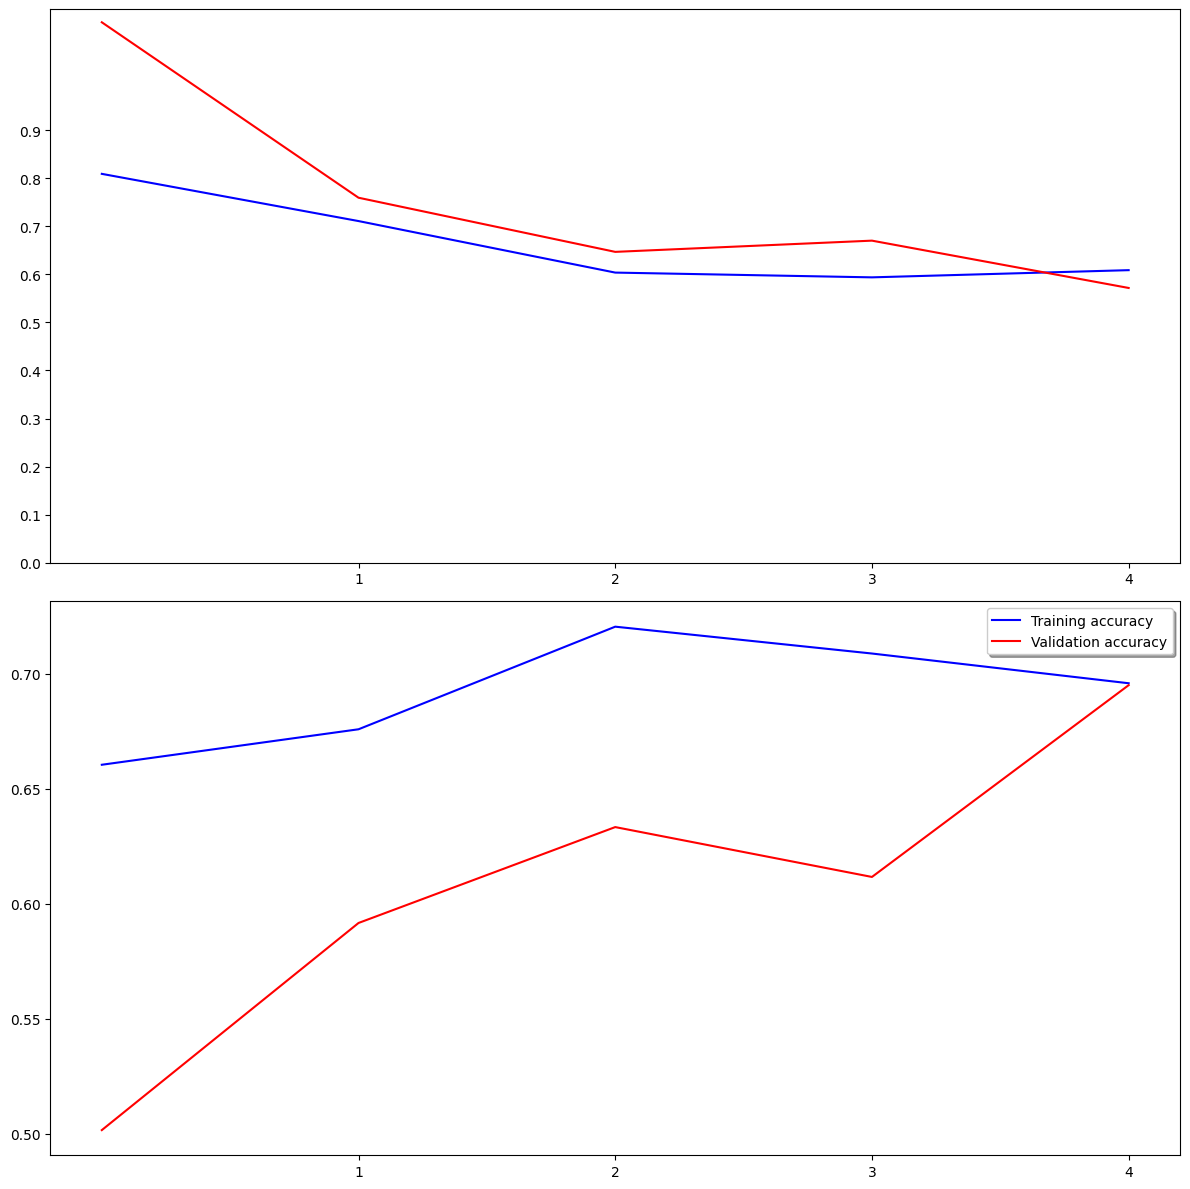

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### 12 Evaluate Model

In [39]:
# Alternative:1
loss, acc = model.evaluate(train_generator)
print("Loss:", round(loss,2))
print("Accuracy:", round(acc,2))

# Alternative:2
score = model.evaluate(train_generator)
print("%s: %.2f%%" % (model.metrics_names[0], score[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

120/120 [==============================] - 51s 424ms/step - loss: 0.6286 - accuracy: 0.6675
Loss: 0.63
Accuracy: 0.67
120/120 [==============================] - 49s 410ms/step - loss: 0.6124 - accuracy: 0.6712
loss: 61.24%
accuracy: 67.12%


### 13 Prepare Testing Data

In [28]:
# test_filenames = os.listdir(os.path.join(mypath, "test_set"))
test_path = os.path.join(mypath, "test_set")
test_filenames = os.listdir(test_path)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
print("nb_samples: ", nb_samples)
test_df

nb_samples:  801


,filename
0,female.026569.jpg
1,female.026586.jpg
2,female.026590.jpg
3,female.026619.jpg
4,female.026621.jpg
...,...
796,man.047676.jpg
797,man.047686.jpg
798,man.047687.jpg
799,man.047690.jpg


### 14 Create Testing Generator

In [29]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_path, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 801 validated image filenames.


### 15 Predict

In [31]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size), verbose=1)
predict.shape

C:\Users\gakbulut\AppData\Local\Temp\ipykernel_19132\1802760709.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size), verbose=1)


41/41 [==============================] - 11s 257ms/step


(801, 2)

In [32]:
test_df['category'] = np.argmax(predict, axis=-1)
print(test_df['category'].shape)
test_df['category']

(801,)


0      0
1      0
2      0
3      0
4      0
      ..
796    1
797    0
798    1
799    0
800    0
Name: category, Length: 801, dtype: int64

In [33]:
train_generator.class_indices

{'female': 0, 'male': 1}

In [34]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'female', 1: 'male'}

In [35]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category']

0      female
1      female
2      female
3      female
4      female
        ...  
796      male
797    female
798      male
799    female
800    female
Name: category, Length: 801, dtype: object

In [36]:
test_df['category'] = test_df['category'].replace({ 'male': 1, 'female': 0 })
test_df['category']

0      0
1      0
2      0
3      0
4      0
      ..
796    1
797    0
798    1
799    0
800    0
Name: category, Length: 801, dtype: int64

### 16 Virtualize Result

0    575
1    226
Name: category, dtype: int64

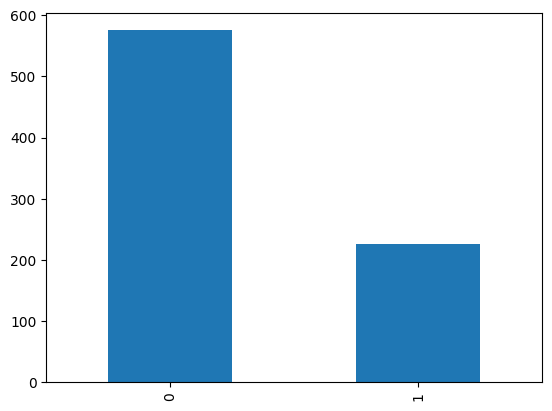

In [37]:
test_df['category'].value_counts().plot.bar()
test_df['category'].value_counts()

### 17 See predicted result with images

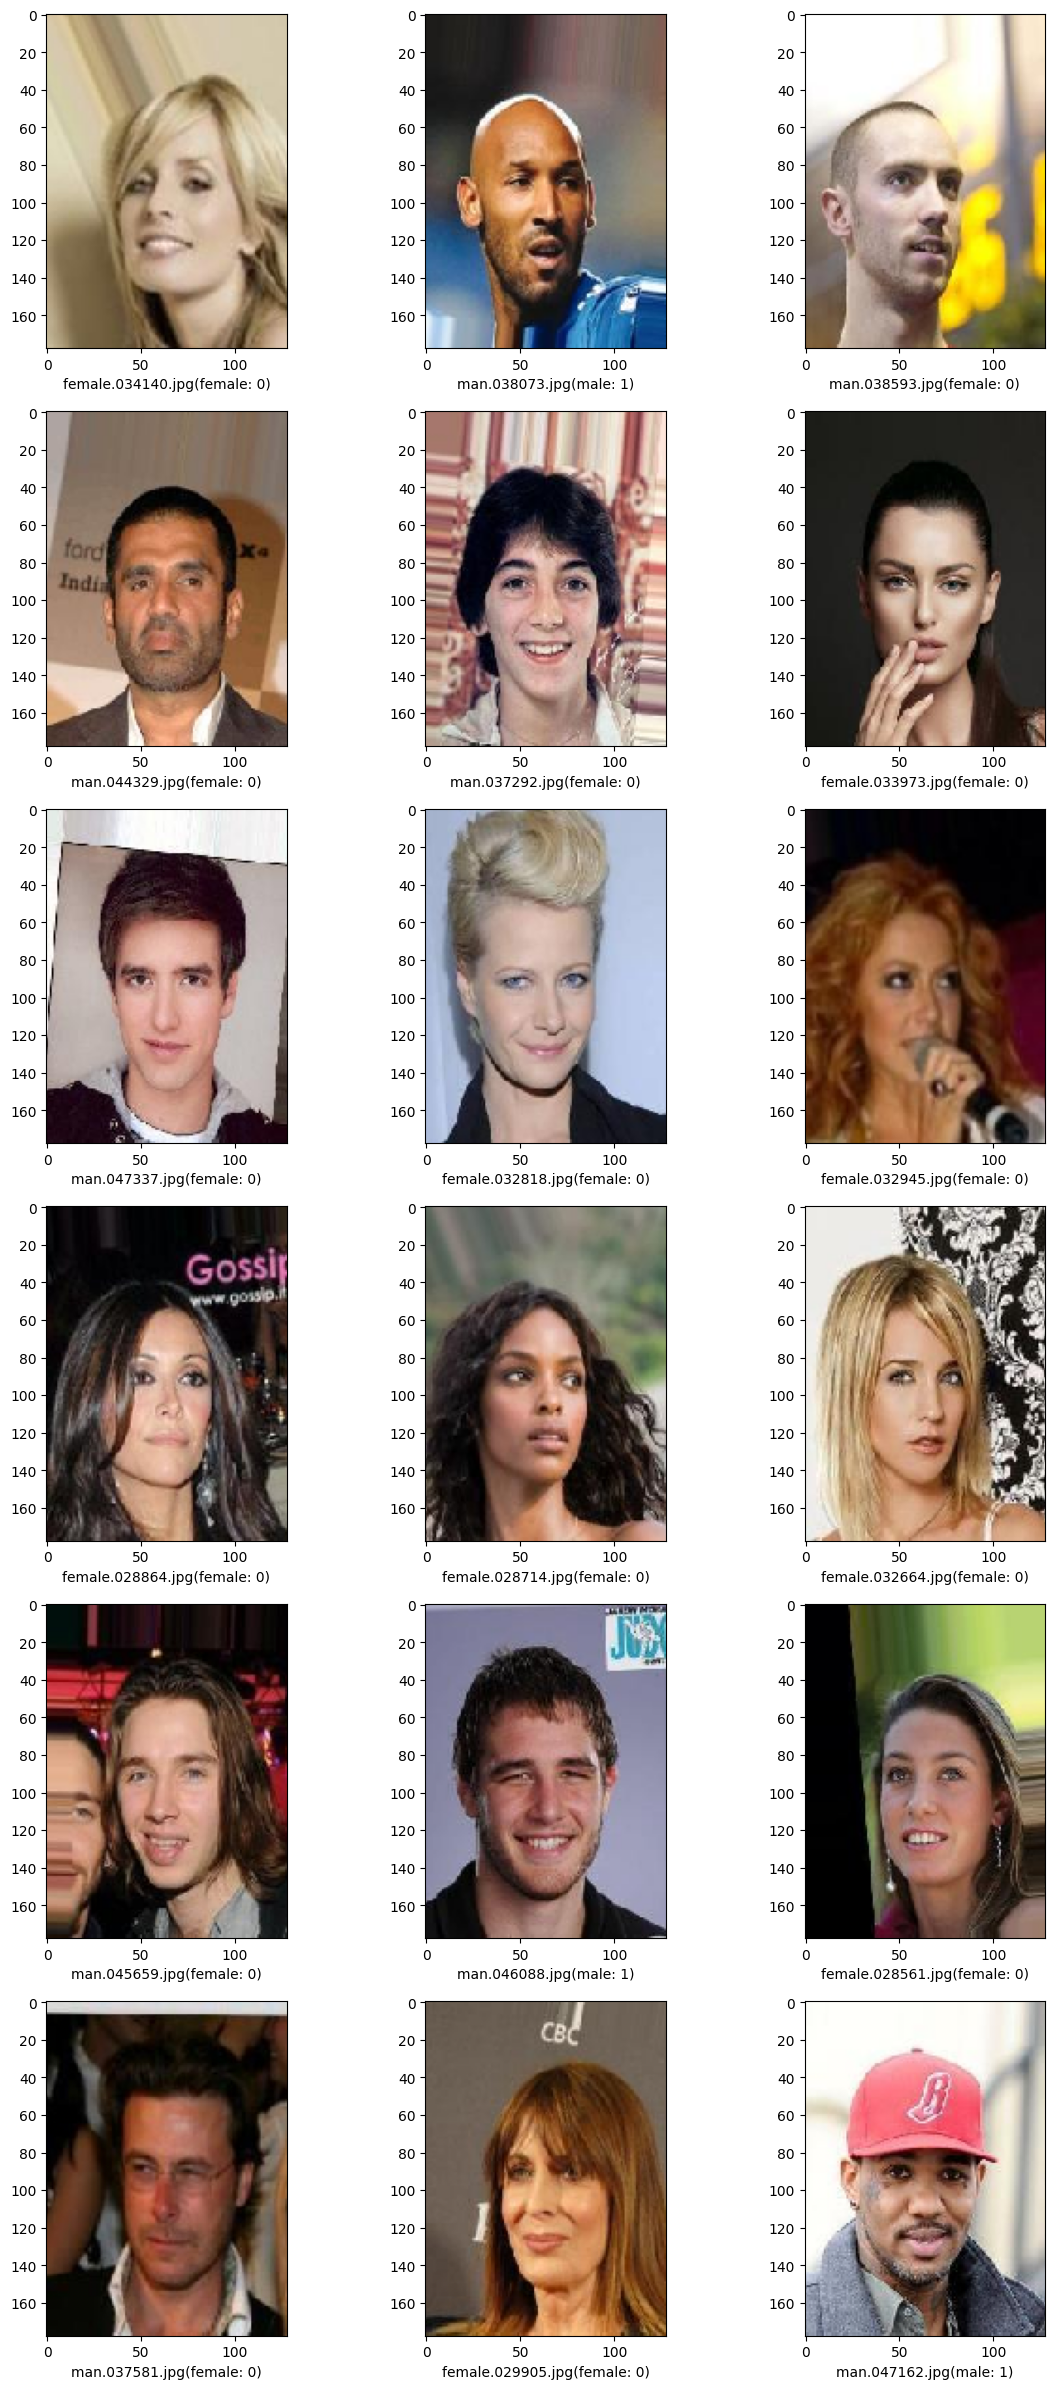

In [38]:
# sample_test = test_df.head(18)
sample_test = test_df.sample(18).reset_index()
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(test_path+"/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    # if category == 0:
    #     gender = "female"
    # else:
    #     gender = "male"    
    # plt.xlabel(filename + '(' + "{}: {}".format(gender, category) + ')' )
    plt.xlabel(filename + '(' + "{}: {}".format(["female" if category == 0 else "male"][0], category) + ')' )
plt.tight_layout()
plt.show()

### 18 Submission

In [38]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)
print("submission_df is saved as submission.csv")
submission_df

submission_df is saved as submission.csv


,id,label
0,female,0
1,female,0
2,female,0
3,female,0
4,female,0
...,...,...
796,man,1
797,man,0
798,man,1
799,man,1
